In [4]:
!pip install pandas
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('h1b_disclosure_data_2015_2019.csv', encoding='latin1')

In [11]:
df.head(6)

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",PA,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",15-1799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA"
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS"
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK"
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,15-1142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK"
5,I-200-10028-460244,CERTIFIED,"SUNERA TECHNOLOGIES, INC",COMPUTER PROGRAMMERS,15-1131,PROGRAMMER ANALYST,Y,61901.0,TROY,MI,2015,MICHIGAN,"TROY, MICHIGAN"


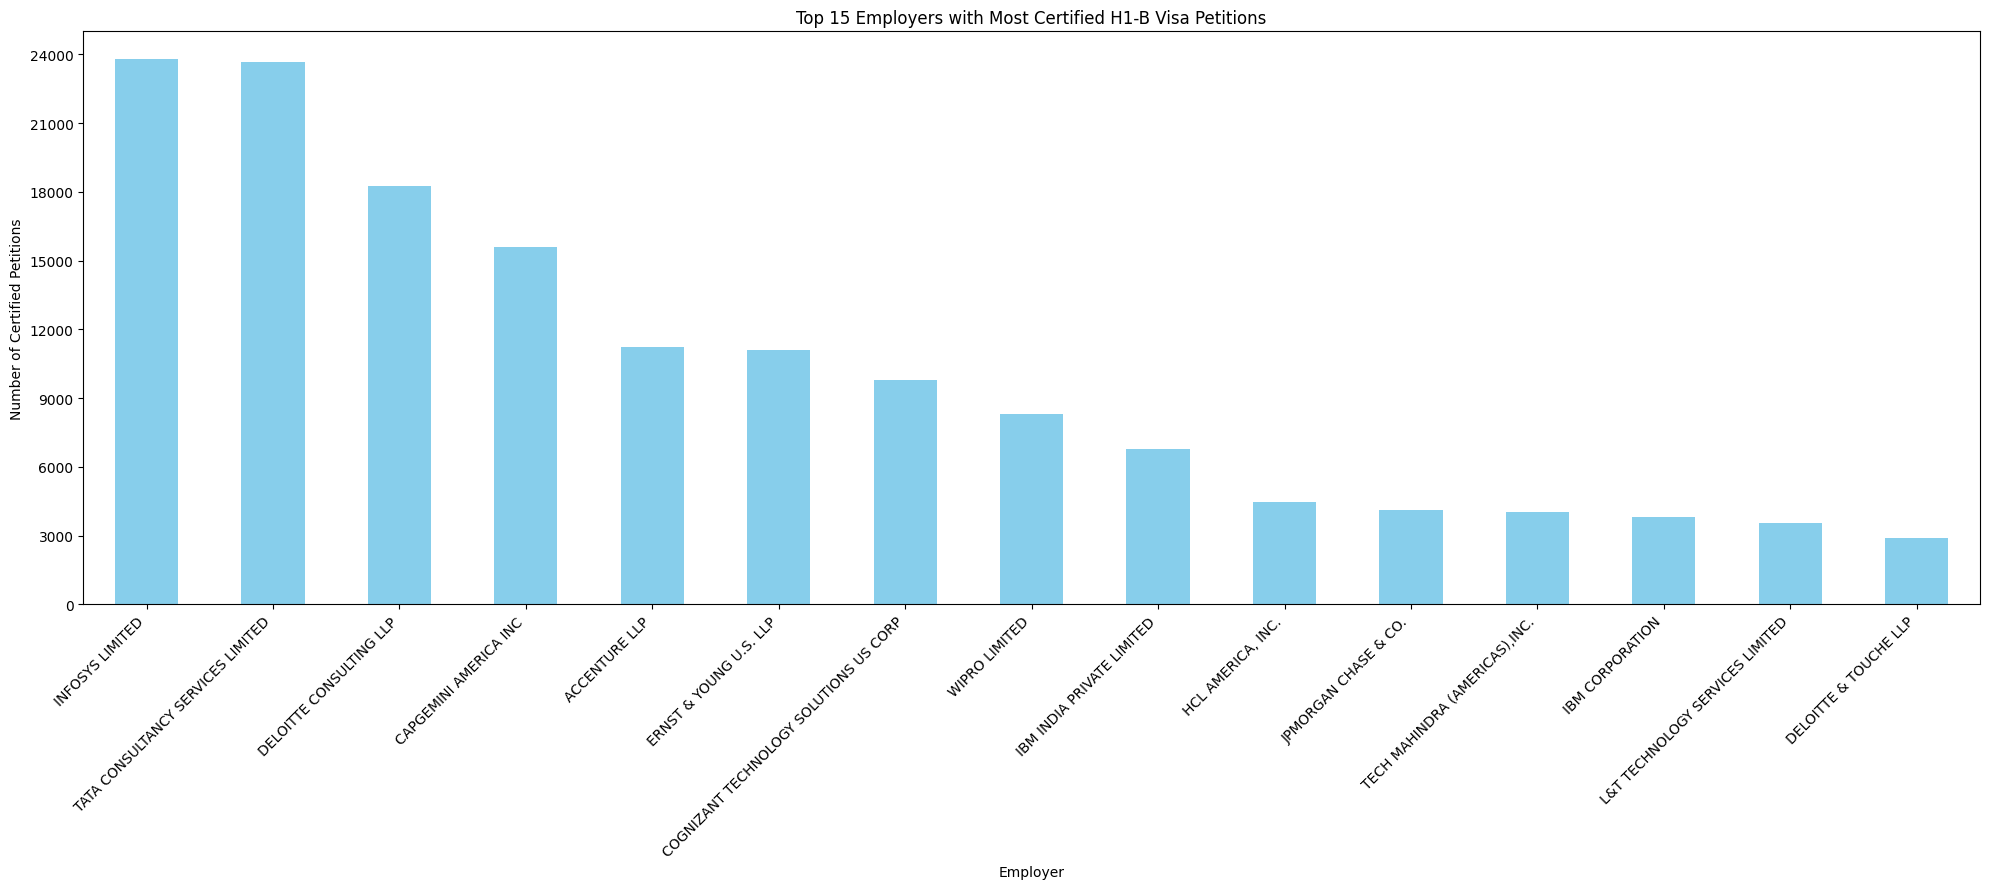

In [31]:
# Filter out only the certified cases
certified_cases = df[df['CASE_STATUS'] == 'CERTIFIED']

# Group by employer name and count the number of certified cases for each employer
employer_certified_counts = certified_cases['EMPLOYER_NAME'].value_counts()

# Filter out employers with less than a certain threshold of applications for more reliable statistics
threshold = 100  # You can adjust this threshold as needed
reliable_employers = employer_certified_counts[employer_certified_counts >= threshold]

# Sort the employers based on the number of certified petitions
top_employers = reliable_employers.head(15)

# Plotting
plt.figure(figsize=(20, 9))
top_employers.plot(kind='bar', color='skyblue')
plt.title('Top 15 Employers with Most Certified H1-B Visa Petitions')
plt.xlabel('Employer')
plt.ylabel('Number of Certified Petitions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Customize the y-axis
plt.ylim(0, 25000)  # Set the y-axis limits from 0 to 1000
plt.yticks(range(0, 25001, 3000))  # Set the y-axis ticks from 0 to 1000 with step 100

plt.tight_layout()

# Show the plot
plt.show()

<Figure size 800x500 with 0 Axes>

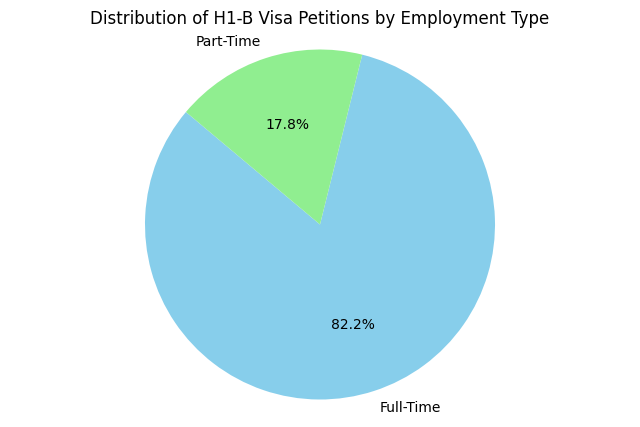

In [40]:
# Filter out full-time and part-time positions
full_time_petitions = df[df['FULL_TIME_POSITION'] == 'Y'].shape[0]
part_time_petitions = df[df['FULL_TIME_POSITION'] == 'N'].shape[0]

# Creating a pie chart
plt.figure(figsize=(8, 5))

# Data to plot
labels = ['Full-Time', 'Part-Time']
sizes = [full_time_petitions, part_time_petitions]
colors = ['skyblue', 'lightgreen']

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of H1-B Visa Petitions by Employment Type')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

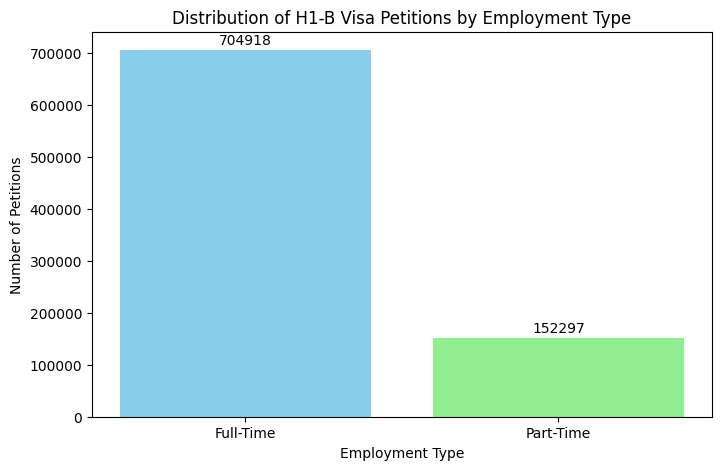

In [41]:
# Count the number of H1-B visa petitions for full-time and part-time positions
full_time_petitions = df[df['FULL_TIME_POSITION'] == 'Y'].shape[0]
part_time_petitions = df[df['FULL_TIME_POSITION'] == 'N'].shape[0]

# Creating a stacked bar chart
plt.figure(figsize=(8, 5))

# Data to plot
labels = ['Full-Time', 'Part-Time']
sizes = [full_time_petitions, part_time_petitions]

# Plotting the stacked bar chart
plt.bar(labels, sizes, color=['skyblue', 'lightgreen'])

# Adding numbers on top of each bar
for i, size in enumerate(sizes):
    plt.text(i, size + 5000, f'{size}', ha='center', va='bottom')

plt.title('Distribution of H1-B Visa Petitions by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Petitions')

# Show the plot
plt.show()

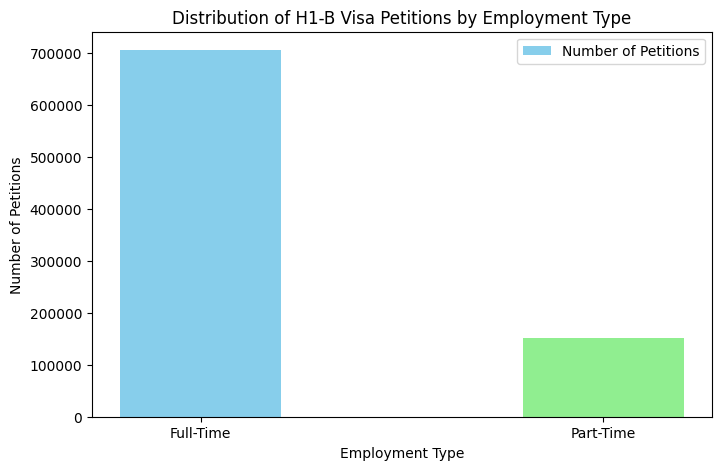

In [42]:
!pip install numpy
import numpy as np

# Count the number of H1-B visa petitions for full-time and part-time positions
full_time_petitions = df[df['FULL_TIME_POSITION'] == 'Y'].shape[0]
part_time_petitions = df[df['FULL_TIME_POSITION'] == 'N'].shape[0]

# Define categories and data
categories = ['Full-Time', 'Part-Time']
data = [full_time_petitions, part_time_petitions]

# Define the number of bars
num_bars = len(categories)

# Set the positions for the bars on the x-axis
positions = np.arange(num_bars)

# Set the width of the bars
width = 0.4

# Create the grouped bar chart
plt.figure(figsize=(8, 5))

plt.bar(positions, data, width, color=['skyblue', 'lightgreen'])

# Add labels, title, and legend
plt.xlabel('Employment Type')
plt.ylabel('Number of Petitions')
plt.title('Distribution of H1-B Visa Petitions by Employment Type')
plt.xticks(positions, categories)
plt.legend(['Number of Petitions'])

# Show the plot
plt.show()


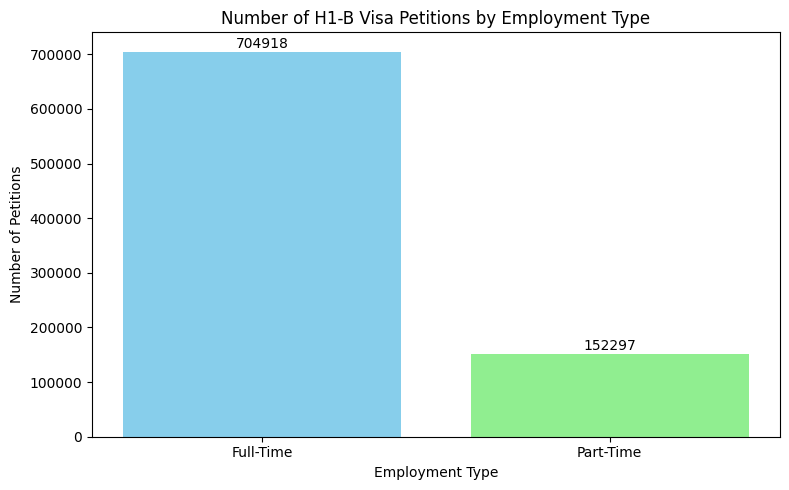

In [43]:
# Count the number of H1-B visa petitions for full-time and part-time positions
full_time_petitions = df[df['FULL_TIME_POSITION'] == 'Y'].shape[0]
part_time_petitions = df[df['FULL_TIME_POSITION'] == 'N'].shape[0]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(['Full-Time', 'Part-Time'], [full_time_petitions, part_time_petitions], color=['skyblue', 'lightgreen'])
plt.title('Number of H1-B Visa Petitions by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Petitions')

# Add text labels for each bar
for i, v in enumerate([full_time_petitions, part_time_petitions]):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()